In [1]:
#!pip install --user -U pip umap-learn seaborn biopython bioframe

In [1]:
from Bio import SeqIO
import bioframe as bf
from collections import Counter
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from umap import UMAP

In [2]:
nucleotides = list("ACGT")
nucleotides

['A', 'C', 'G', 'T']

In [3]:
embedding_pos = np.load("example_embedding_1M_pos.1M.npy")
embedding_pos.shape

(1000000, 512)

In [4]:
embedding_neg = np.load("example_embedding_1M_neg.1M.npy")
embedding_neg.shape

(1000000, 512)

In [5]:
embedding = np.stack((embedding_pos, embedding_neg[::-1])).mean(axis=0)
embedding.shape

(1000000, 512)

In [99]:
standardized_embedding = StandardScaler().fit_transform(embedding)
standardized_embedding.shape

(1000000, 512)

In [6]:
window_size = 1000000
center = 3566700

In [171]:
N_PCS = 100
latent = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=N_PCS))
]).fit_transform(embedding)
latent.shape

(1000000, 100)

In [169]:
def plot_latent(latent, start, end, n_components=N_PCS, redo_pca=False, vmax=None):
    latent_zoom = latent[window_size//2+start-center:window_size//2+end-center, :n_components]
    print(latent_zoom.shape)
    if redo_pca:
        print("Running PCA on zoomed-in window")
        latent_zoom = latent = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=n_components))]).fit_transform(latent_zoom)
        print(latent_zoom.shape)
    
    df2 = pd.DataFrame(data=latent_zoom.T)
    df2.index += 1
    df2.index = "PC" + df2.index.astype(str)
    #plt.figure(figsize=(15, 3))
    plt.figure(figsize=(15, 5))

    sns.heatmap(
        data=df2,
        cmap="bwr",
        #cmap="coolwarm",
        center=0,
        square=False,
        yticklabels=1,
        vmin=-vmax if vmax is not None else None,
        vmax=vmax,
        cbar=False,
    )
    #plt.xlabel("pos")
    plt.xticks([], [])
    #plt.yticks(rotation = 0)
    plt.yticks([], [])
    #plt.ylabel("Embedding principal component");
    return df2

(1000, 512)


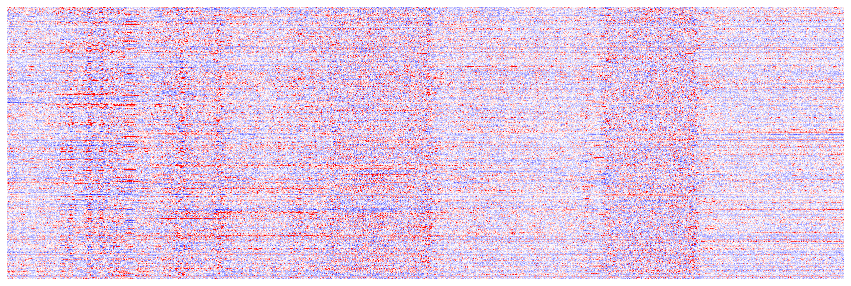

In [200]:
df2 = plot_latent(standardized_embedding, 3567000, 3568000, n_components=512, vmax=3)

(1000, 40)


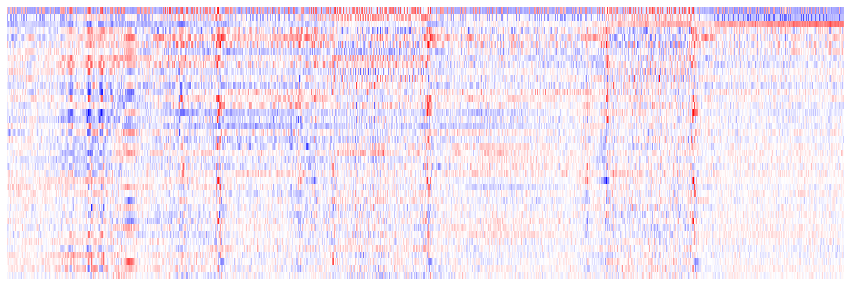

In [193]:
df2 = plot_latent(latent, 3567000, 3568000, n_components=40, vmax=None)

#plt.savefig("pca_viz_2.svg", bbox_inches="tight")

(1000, 10)


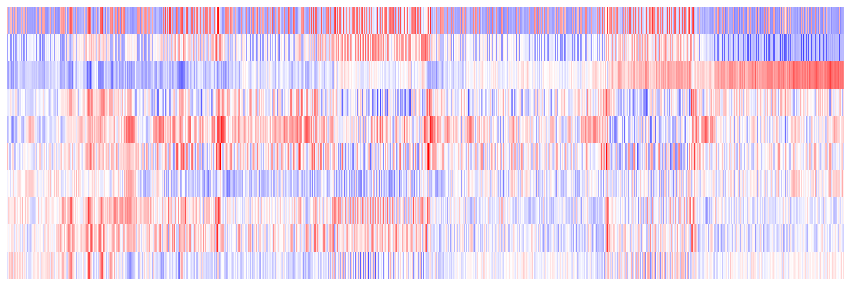

In [195]:
df2 = plot_latent(latent, 3567000, 3568000, n_components=10, vmax=None)


In [20]:
df2 = df2.T
df2

,PC1,PC2,PC3,PC4,PC5
0,3.371979,-4.255718,-3.820791,-0.899161,-3.132056
1,-3.918364,-0.230732,-4.294594,-1.002469,-2.183653
2,-3.018265,-0.295509,-1.980793,-0.480359,-0.242920
3,3.260406,-4.972451,-2.700057,1.419600,-0.608269
4,3.920180,-5.502060,-4.400880,0.720930,-3.177485
...,...,...,...,...,...
995,-5.192722,-3.123914,6.379647,2.968482,0.164634
996,-3.963313,-3.090815,6.158660,-0.272703,1.576937
997,-3.760226,-3.018368,6.424556,-3.333806,1.764928
998,-4.007693,-2.323996,7.662392,-2.149042,2.758298


In [24]:
df2["nucleotide"] = list(str(genome["5"][3567000:3568000].seq))
df2

,PC1,PC2,PC3,PC4,PC5,nucleotide
0,3.371979,-4.255718,-3.820791,-0.899161,-3.132056,G
1,-3.918364,-0.230732,-4.294594,-1.002469,-2.183653,A
2,-3.018265,-0.295509,-1.980793,-0.480359,-0.242920,A
3,3.260406,-4.972451,-2.700057,1.419600,-0.608269,C
4,3.920180,-5.502060,-4.400880,0.720930,-3.177485,C
...,...,...,...,...,...,...
995,-5.192722,-3.123914,6.379647,2.968482,0.164634,T
996,-3.963313,-3.090815,6.158660,-0.272703,1.576937,T
997,-3.760226,-3.018368,6.424556,-3.333806,1.764928,T
998,-4.007693,-2.323996,7.662392,-2.149042,2.758298,A


<AxesSubplot:xlabel='nucleotide', ylabel='PC1'>

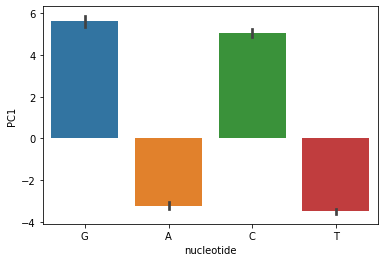

In [26]:
sns.barplot(data=df2, x="nucleotide", y="PC1")

<AxesSubplot:xlabel='nucleotide', ylabel='PC3'>

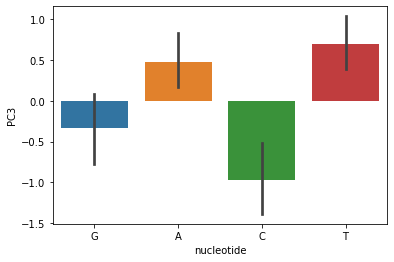

In [27]:
sns.barplot(data=df2, x="nucleotide", y="PC3")

<AxesSubplot:xlabel='nucleotide', ylabel='PC4'>

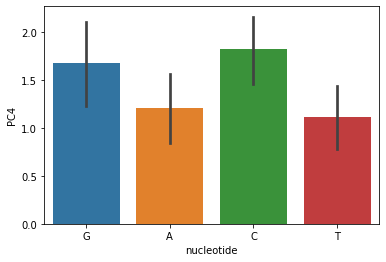

In [438]:
sns.barplot(data=df2, x="nucleotide", y="PC4")

In [ ]:
plt.hist()

In [90]:
def plot_latent_line(latent, start, end, n_components=N_PCS):
    latent_zoom = latent[window_size//2+start-center:window_size//2+end-center, :n_components]
    print(latent_zoom.shape)
    if latent_zoom.shape[1] == 512:  # redo PCA
        print("Running PCA on zoomed-in window")
        latent_zoom = latent = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=40))]).fit_transform(latent_zoom)
        print(latent_zoom.shape)
    
    df2 = pd.DataFrame(data=latent_zoom)
    df2.columns = "PC" + df2.columns.astype(str)
    df2["pos"] = df2.index
    df2 = pd.wide_to_long(df2, ["PC"], "pos", "pc_index").reset_index()
    df2.pc_index += 1
    
    plt.figure(figsize=(20, 5))
    #sns.heatmap(
    #    data=df2,
    #    cmap="bwr",
    #    center=0,
    #    square=False,
    #    yticklabels=1,
    #    cbar=False,
    #)
    
    g = sns.relplot(
        data=df2,
        x="pos",
        y="PC",
        row="pc_index",
        height=1,
        aspect=10,
        kind="line",
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(row_template="PC{row_name}")
    g.set(xticks=[], xlabel="")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    g.figure.subplots_adjust(hspace=0)
    
    #plt.xlabel("pos")
    #plt.xticks([], [])
    #plt.yticks([], [])
    #plt.ylabel("embedding principal component");

(1000, 10)


<Figure size 1440x360 with 0 Axes>

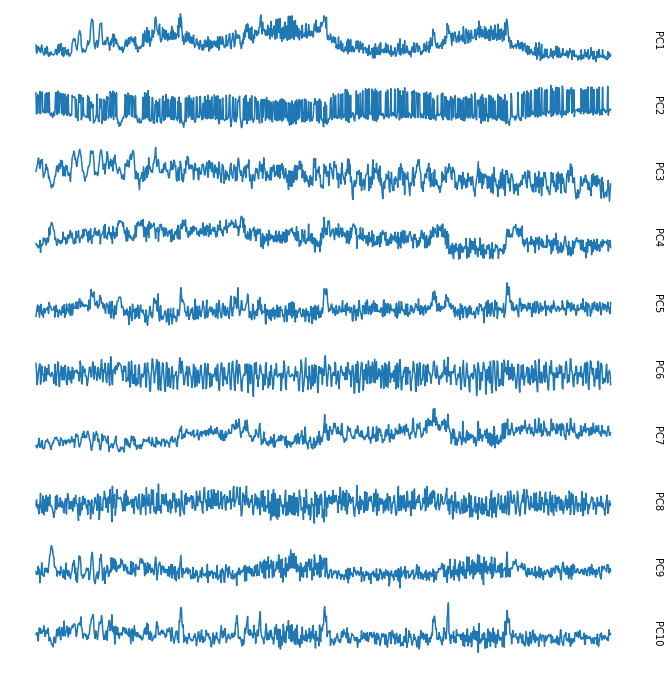

In [84]:
plot_latent_line(latent, 3567000, 3568000, n_components=10)

## Promoter, exons
TODO: find better example without something weird on the far left

http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3566700%2D3567700&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(1000, 40)


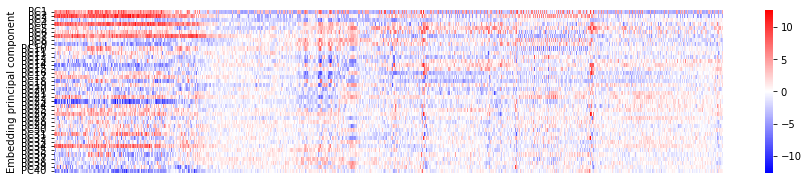

In [11]:
plot_latent(latent, 3566700, 3567700);

In [13]:
#plot_latent(embedding, 3566700, 3567700);

# Example TFBS from FunTFBS
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3561938%2D3562102&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(164, 40)


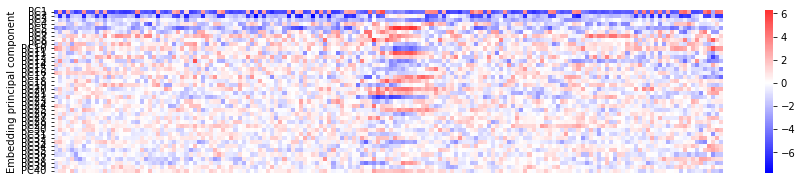

In [15]:
plot_latent(latent, 3561938, 3562102);

(164, 512)
Running PCA on zoomed-in window
(164, 40)


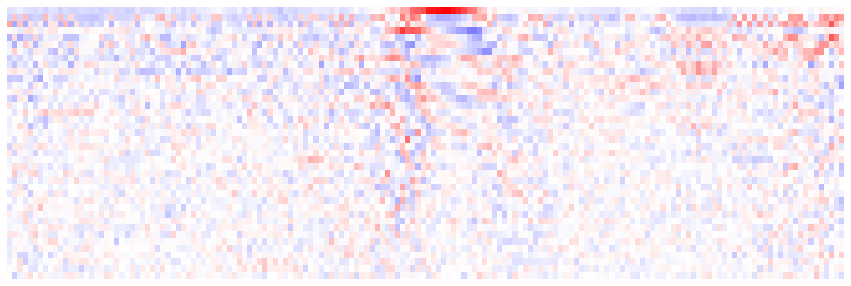

In [13]:
plot_latent(embedding, 3561938, 3562102)

## Start codon
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3567354%2D3567402&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(49, 40)


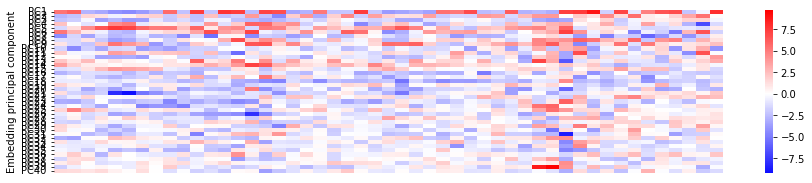

In [16]:
plot_latent(latent, 3567353, 3567402);

(49, 512)
Running PCA on zoomed-in window
(49, 40)


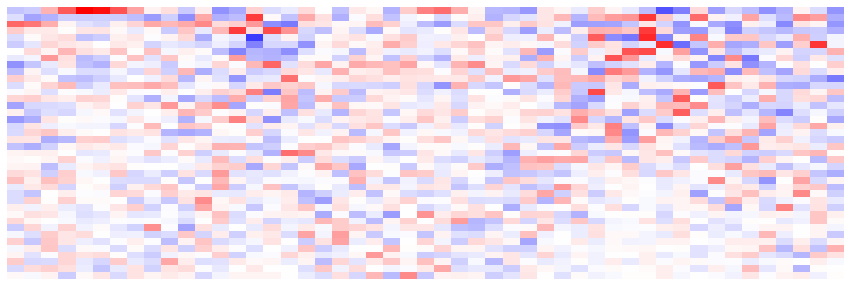

In [15]:
plot_latent(embedding, 3567353, 3567402)

## Alternative splicing
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3568832%2D3569781&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(950, 40)


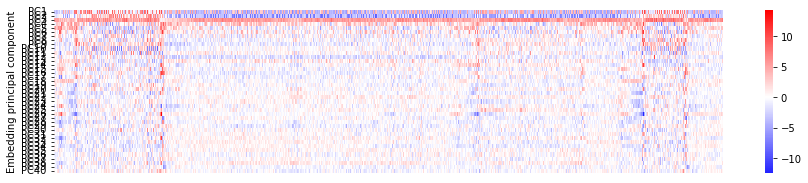

In [17]:
plot_latent(latent, 3568831, 3569781);

(950, 512)
Running PCA on zoomed-in window
(950, 40)


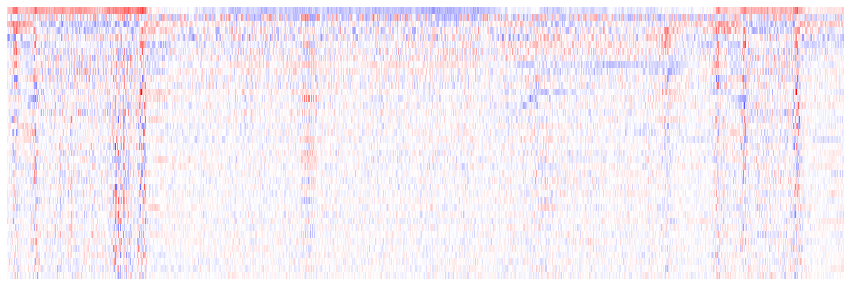

In [17]:
plot_latent(embedding, 3568831, 3569781)

## Gene on the negative strand. there's another thing interesting here, to inspect
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3557971%2D3558946&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(976, 40)


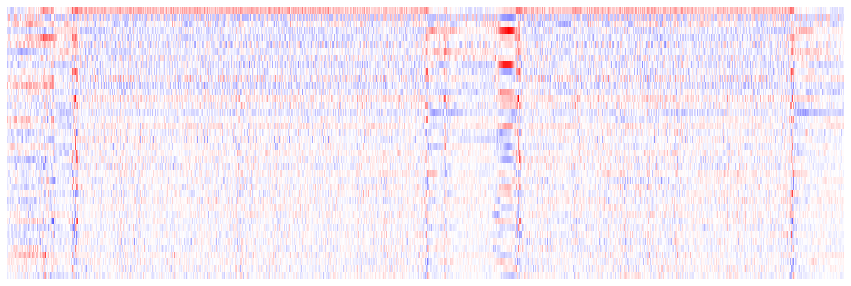

In [18]:
plot_latent(latent, 3557970, 3558946)

(976, 512)
Running PCA on zoomed-in window
(976, 40)


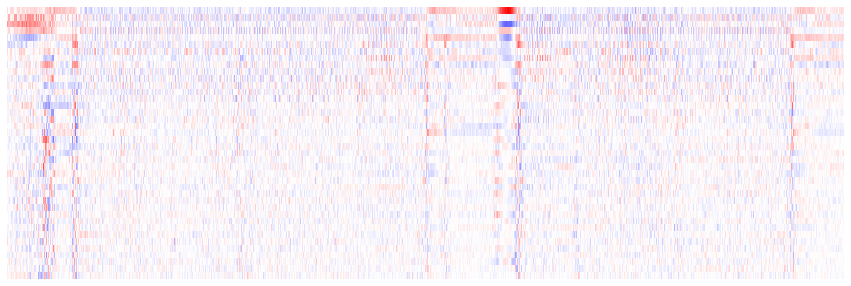

In [19]:
plot_latent(embedding, 3557970, 3558946)

In [20]:
"""
for pc in range(1, 21):
    df_bedgraph = pd.DataFrame({
        "chromosome": ["chr5" for _ in range(len(latent_zoom))],
        "start": np.arange(start, end),
        "end": np.arange(start+1, end+1),
        "values": latent_zoom[:, pc-1],
    })
    print(df_bedgraph)

    with open(f'example_bedgraph_PC{pc}.txt', 'a') as file:
        file.write(f'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n')
        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)
"""

'\nfor pc in range(1, 21):\n    df_bedgraph = pd.DataFrame({\n        "chromosome": ["chr5" for _ in range(len(latent_zoom))],\n        "start": np.arange(start, end),\n        "end": np.arange(start+1, end+1),\n        "values": latent_zoom[:, pc-1],\n    })\n    print(df_bedgraph)\n\n    with open(f\'example_bedgraph_PC{pc}.txt\', \'a\') as file:\n        file.write(f\'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n\')\n        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)\n'

## UMAP analysis

In [22]:
with gzip.open("../../data/mlm/genome/Arabidopsis_thaliana.fa.gz", "rt") as handle:
    genome = SeqIO.to_dict(SeqIO.parse(handle, "fasta"))
genome = {k: v.upper() for k, v in genome.items()}
genome

{'1': SeqRecord(seq=Seq('CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCC...GGG'), id='1', name='1', description='1 dna_sm:chromosome chromosome:TAIR10:1:1:30427671:1 REF', dbxrefs=[]),
 '2': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...GGG'), id='2', name='2', description='2 dna_sm:chromosome chromosome:TAIR10:2:1:19698289:1 REF', dbxrefs=[]),
 '3': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...CCC'), id='3', name='3', description='3 dna_sm:chromosome chromosome:TAIR10:3:1:23459830:1 REF', dbxrefs=[]),
 '4': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...AGG'), id='4', name='4', description='4 dna_sm:chromosome chromosome:TAIR10:4:1:18585056:1 REF', dbxrefs=[]),
 '5': SeqRecord(seq=Seq('TATACCATGTACCCTCAACCTTAAAACCCTAAAACCTATACTATAAATCTTTAA...ATC'), id='5', name='5', description='5 dna_sm:chromosome chromosome:TAIR10:5:1:26975502:1 REF', dbxrefs=[]),
 'Mt': SeqRecord(seq=Seq('GGATCCGTTCGAAA

In [74]:
# issue: it doesn't have mRNA
#!wget https://ics.hutton.ac.uk/atRTD/RTD3/atRTD3_TS_21Feb22_transfix.gtf
#!head atRTD3_TS_21Feb22_transfix.gtf

In [76]:
!wget http://ftp.ensemblgenomes.org/pub/plants/release-54/gff3/arabidopsis_thaliana/Arabidopsis_thaliana.TAIR10.54.chromosome.5.gff3.gz
!zcat Arabidopsis_thaliana.TAIR10.54.chromosome.5.gff3.gz | head

wget: /global/software/sl-7.x86_64/modules/langs/python/3.7/lib/libuuid.so.1: no version information available (required by wget)
--2022-07-27 16:25:05--  http://ftp.ensemblgenomes.org/pub/plants/release-54/gff3/arabidopsis_thaliana/Arabidopsis_thaliana.TAIR10.54.chromosome.5.gff3.gz
Resolving ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)... 193.62.193.141
Connecting to ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)|193.62.193.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: 'Arabidopsis_thaliana.TAIR10.54.chromosome.5.gff3.gz.1'

    [                                   <=> ] 2,173,879    317KB/s   in 9.5s   

2022-07-27 16:25:14 (224 KB/s) - 'Arabidopsis_thaliana.TAIR10.54.chromosome.5.gff3.gz.1' saved [2173879]

##gff-version 3
##sequence-region   5 1 26975502
#!genome-build The Arabidopsis Information Resource TAIR10
#!genome-version TAIR10
#!genome-date 2008-04
#!genome-build-accession GCA_000001735.1


In [194]:
"""transcripts = gtf[gtf.feature=="mRNA"]
transcripts["transcript_id"] = transcripts.attribute.str.split(";").str[0].str.split("=").str[1]
transcripts
"""

'transcripts = gtf[gtf.feature=="mRNA"]\ntranscripts["transcript_id"] = transcripts.attribute.str.split(";").str[0].str.split("=").str[1]\ntranscripts\n'

In [195]:
"""gtf2 = gtf.query("feature == 'exon' and start >= 10000 and end <= 990000").copy()
gtf2
"""

'gtf2 = gtf.query("feature == \'exon\' and start >= 10000 and end <= 990000").copy()\ngtf2\n'

In [196]:
"""gtf2["transcript_id"] = gtf2.attribute.str.split("=").str[1]
gtf2.transcript_id.value_counts()
"""

'gtf2["transcript_id"] = gtf2.attribute.str.split("=").str[1]\ngtf2.transcript_id.value_counts()\n'

In [197]:
"""def get_first_intron(exons):
    if len(exons) < 2:
        return ""
    first_exons_idx = [0, 1] if (exons.strand == "+").any() else [-2, -1]
    first_exons = exons.sort_values("start").iloc[first_exons_idx]
    return first_exons.iloc[0].end, first_exons.iloc[1].start
    #raise Exception("debug")

first_introns = gtf2.groupby("transcript_id").apply(get_first_intron)
first_introns
"""

'def get_first_intron(exons):\n    if len(exons) < 2:\n        return ""\n    first_exons_idx = [0, 1] if (exons.strand == "+").any() else [-2, -1]\n    first_exons = exons.sort_values("start").iloc[first_exons_idx]\n    return first_exons.iloc[0].end, first_exons.iloc[1].start\n    #raise Exception("debug")\n\nfirst_introns = gtf2.groupby("transcript_id").apply(get_first_intron)\nfirst_introns\n'

In [198]:
"""first_introns = first_introns[first_introns != ""]
first_introns
"""

'first_introns = first_introns[first_introns != ""]\nfirst_introns\n'

In [199]:
"""first_introns.drop_duplicates(inplace=True)
first_introns = first_introns.to_frame()
first_introns["chrom"] = "my_contig"
first_introns["start"] = first_introns[0].apply(lambda x: x[0])
first_introns["end"] = first_introns[0].apply(lambda x: x[1])
first_introns.drop(columns=0, inplace=True)
first_introns
"""

'first_introns.drop_duplicates(inplace=True)\nfirst_introns = first_introns.to_frame()\nfirst_introns["chrom"] = "my_contig"\nfirst_introns["start"] = first_introns[0].apply(lambda x: x[0])\nfirst_introns["end"] = first_introns[0].apply(lambda x: x[1])\nfirst_introns.drop(columns=0, inplace=True)\nfirst_introns\n'

In [200]:
# Experimental: shrink features to avoid sampling a position
# at the edge between and exon and intron, where local averaging
# might go wrong
edge = 20
gtf.start += edge
gtf.end -= edge

In [201]:
gtf.feature.value_counts()

exon               3606
CDS                3242
five_prime_UTR      641
three_prime_UTR     560
mRNA                521
gene                280
ncRNA_gene           41
lnc_RNA              33
tRNA                  7
miRNA                 6
ncRNA                 2
snoRNA                2
snRNA                 1
Name: feature, dtype: int64

In [202]:
gtf = gtf[gtf.feature != "protein"]  # redundant
gtf = gtf[gtf.feature != "gene"]  # redundant
gtf = gtf[~gtf.feature.isin(["start_codon", "stop_codon", "ncRNA_gene"])]
gtf.shape

(8621, 9)

In [203]:
#gtf.head(100).tail(50)

In [204]:
#df['gene_id'] = df.attribute.str.extract(r'gene_id "([^;]*)";')
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)"')  # the filtered versions need this
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)";')

In [205]:
overlaps = pd.Series(["Intergenic"] * window_size)
i = -1
for row_index, row in gtf.iterrows():
    i += 1
    if i % 1000 == 0: print(i)
    if row.end > row.start:
        overlaps[row.start:row.end] += "," + row.feature
overlaps = overlaps.str.split(",").apply(Counter)

0
1000
2000
3000
4000
5000
6000
7000
8000


In [206]:
overlaps.value_counts()

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                         286173
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                         148550
{'Intergenic': 1, 'mRNA': 1}                                              120053
{'Intergenic': 1, 'mRNA': 2}                                               75425
{'Intergenic': 1, 'mRNA': 2, 'exon': 2, 'CDS': 2}                          55399
                                                                           ...  
{'Intergenic': 1, 'mRNA': 5, 'CDS': 2, 'exon': 5, 'five_prime_UTR': 3}         3
{'Intergenic': 1, 'exon': 1, 'CDS': 1}                                         3
{'Intergenic': 1, 'mRNA': 4, 'exon': 4, 'five_prime_UTR': 2}                   2
{'Intergenic': 1, 'lnc_RNA': 4, 'mRNA': 4, 'exon': 3, 'CDS': 3}                1
{'Intergenic': 1, 'lnc_RNA': 5, 'exon': 1, 'mRNA': 4}                          1
Length: 305, dtype: int64

In [207]:
overlaps.value_counts()[:20]

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                          286173
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                          148550
{'Intergenic': 1, 'mRNA': 1}                                               120053
{'Intergenic': 1, 'mRNA': 2}                                                75425
{'Intergenic': 1, 'mRNA': 2, 'exon': 2, 'CDS': 2}                           55399
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'three_prime_UTR': 1}               36196
{'Intergenic': 1, 'mRNA': 3}                                                32724
{'Intergenic': 1, 'mRNA': 3, 'exon': 3, 'CDS': 3}                           31841
{'Intergenic': 1, 'mRNA': 1, 'five_prime_UTR': 1, 'exon': 1}                27532
{'Intergenic': 1, 'mRNA': 2, 'three_prime_UTR': 2, 'exon': 2}               13092
{'Intergenic': 1, 'mRNA': 1, 'exon': 1}                                     12236
{'Intergenic': 1, 'mRNA': 4}                                                11227
{'Intergenic': 1

In [377]:
segmentation = pd.Series([""] * window_size)

segmentation[overlaps==Counter(Intergenic=1)] = "Intergenic"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1)] = "Intron"  # technically should include all mRNA>=1
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, CDS=1)] = "CDS"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, five_prime_UTR=1)] = "5' UTR"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, three_prime_UTR=1)] = "3' UTR"

#segmentation[overlaps==Counter(Intergenic=1, lnc_RNA=1, exon=1)] = "ncRNA"


# can comment this one out, not sure it's working. they are too few so they cluster too much by gene, I guess
#segmentation[overlaps==Counter(Intergenic=1, mRNA=2, exon=1, CDS=1)] = "alt_spliced_cds"  # again, could do mRNA>=1, etc.
segmentation.value_counts()

              381496
Intergenic    286173
CDS           148550
Intron        120053
3' UTR         36196
5' UTR         27532
dtype: int64

In [378]:
segmentation = segmentation[segmentation!=""]
border = 10000
segmentation = segmentation[border:-border]

In [450]:
segmentation.shape

(598504,)

In [470]:
#segmentation_subset = segmentation.groupby(segmentation).sample(n=2500, random_state=42).to_frame().rename(columns={0: "Region"})
segmentation_subset = segmentation.sample(n=10000, random_state=42).to_frame().rename(columns={0: "Region"})


segmentation_subset = segmentation_subset.sample(frac=1, random_state=42)  # just shuffle
segmentation_subset["pos"] = segmentation_subset.index
segmentation_subset

,Region,pos
925338,Intergenic,925338
950971,Intron,950971
65099,Intergenic,65099
538732,Intergenic,538732
216396,Intergenic,216396
...,...,...
553019,Intron,553019
394241,Intron,394241
797125,Intergenic,797125
244626,Intergenic,244626


In [471]:
segmentation_subset.Region.value_counts()

Intergenic    4644
CDS           2296
Intron        1998
3' UTR         595
5' UTR         467
Name: Region, dtype: int64

In [472]:
"""segmentation_subset["chrom"] = "Chr5"
segmentation_subset["start"] = segmentation_subset.pos
segmentation_subset["end"] = segmentation_subset.start + 1
original_idx = segmentation_subset.index.values
segmentation_subset = bf.closest(segmentation_subset, transcripts, suffixes=('','_2')).set_index("pos").loc[original_idx]
segmentation_subset
"""

'segmentation_subset["chrom"] = "Chr5"\nsegmentation_subset["start"] = segmentation_subset.pos\nsegmentation_subset["end"] = segmentation_subset.start + 1\noriginal_idx = segmentation_subset.index.values\nsegmentation_subset = bf.closest(segmentation_subset, transcripts, suffixes=(\'\',\'_2\')).set_index("pos").loc[original_idx]\nsegmentation_subset\n'

In [473]:
#segmentation_subset.groupby("Region").distance.mean()

In [474]:
aggregation = "mean"#"concat" #None
n_aggregation = 33#15 # None  # different categories benefit from different n_aggregation

In [475]:
segmentation_subset["nucleotide"] = segmentation_subset.apply(lambda row: genome["5"][row.name + center-window_size//2], axis=1)
segmentation_subset["nucleotide_window"] = segmentation_subset.apply(
    lambda row: str(genome["5"][row.name + center-window_size//2 - n_aggregation//2:row.name + center-window_size//2 + 1 + n_aggregation//2].seq),
    axis=1
)
segmentation_subset

,Region,pos,nucleotide,nucleotide_window
925338,Intergenic,925338,T,TGCATAATGTATTTTTTTGGTGACAGTTTTGTC
950971,Intron,950971,A,AAAAGCTCAATCTCTGAACAACCACACTAACTT
65099,Intergenic,65099,G,GTAAGAGTATTTTAGTGGGGGTTTTCCAACTAG
538732,Intergenic,538732,A,CAATTTCTTTGGTAAAAAATTGTAAGAATGATT
216396,Intergenic,216396,T,ATGAATACGAAAGACATTTTATGTAATTTTTGG
...,...,...,...,...
553019,Intron,553019,G,TTTAGTTGGTTCACTGGTCATTGTAATAGGTGT
394241,Intron,394241,G,TACCTCATCAGATTCAGATTCAGCATCATCTTC
797125,Intergenic,797125,G,ATGGAGATAAGAAAAAGCAAATAAGAAAAAATG
244626,Intergenic,244626,A,AGTTGAGTATAAGGACAATAATAAGAGCAAGGA


In [494]:
features = embedding
#features = latent  # works worse

In [495]:
if aggregation is None:
    embedding_subset = features[segmentation_subset.index.values]
elif aggregation == "concat":
    embedding_subset = features[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].reshape(len(segmentation_subset), -1)
elif aggregation == "mean":
    embedding_subset = features[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].sum(axis=1)
embedding_subset.shape

(10000, 512)

In [496]:
"""k = 5#1
seqs = segmentation_subset.nucleotide_window.values

obj = kmer_featurization(k) 
kmer_features = obj.obtain_kmer_feature_for_a_list_of_sequences(seqs, write_number_of_occurrences=False)
kmer_features"""

'k = 5#1\nseqs = segmentation_subset.nucleotide_window.values\n\nobj = kmer_featurization(k) \nkmer_features = obj.obtain_kmer_feature_for_a_list_of_sequences(seqs, write_number_of_occurrences=False)\nkmer_features'

In [497]:
idx = slice(None)
#idx = np.where(segmentation_subset.nucleotide.isin(["G", "C"]))[0]
segmentation_subset = segmentation_subset.iloc[idx]

In [498]:
"""nucleotide_mean = {}
for nc in nucleotides:
    nucleotide_mean[nc] = embedding_subset[segmentation_subset.nucleotide==nc].mean(axis=0)
for i in range(len(embedding_subset)):
    embedding_subset[i] -= nucleotide_mean[segmentation_subset.iloc[i].nucleotide]
"""    

'nucleotide_mean = {}\nfor nc in nucleotides:\n    nucleotide_mean[nc] = embedding_subset[segmentation_subset.nucleotide==nc].mean(axis=0)\nfor i in range(len(embedding_subset)):\n    embedding_subset[i] -= nucleotide_mean[segmentation_subset.iloc[i].nucleotide]\n'

In [499]:
projector = Pipeline([
    ("scaler", StandardScaler()),  # not sure it's a good idea. yeah, they have very different variances.
    #("pca", PCA(n_components=10)),
    ("umap", UMAP(n_components=2, random_state=42)),  # n_neighbors should change with number of positions
])
segmentation_subset[["UMAP1", "UMAP2"]] = projector.fit_transform(embedding_subset[idx])
#segmentation_subset[["UMAP1", "UMAP2"]] = projector.fit_transform(kmer_features)

In [500]:
"""sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="nucleotide"
)
"""

'sns.scatterplot(\n    data=segmentation_subset,\n    x="UMAP1",\n    y="UMAP2",\n    hue="nucleotide"\n)\n'

In [501]:
"""segmentation_subset["chrom"] = "my_contig"
segmentation_subset["start"] = segmentation_subset.index
segmentation_subset["end"] = segmentation_subset.start + 1
segmentation_subset = bf.coverage(segmentation_subset, first_introns)
segmentation_subset"""

'segmentation_subset["chrom"] = "my_contig"\nsegmentation_subset["start"] = segmentation_subset.index\nsegmentation_subset["end"] = segmentation_subset.start + 1\nsegmentation_subset = bf.coverage(segmentation_subset, first_introns)\nsegmentation_subset'

In [502]:
#segmentation_subset.groupby("Region").coverage.value_counts()

In [503]:
#segmentation_subset.loc[segmentation_subset.coverage > 0, "Region"] = "First intron"
#segmentation_subset.Region.value_counts()

In [504]:
#embedding_subset.std(axis=0)

In [505]:
region_order = ["CDS", "5' UTR", "3' UTR", "Intron", "Intergenic"]
#region_order = ["Intergenic", "CDS", "5' UTR", "3' UTR", "Intron"]

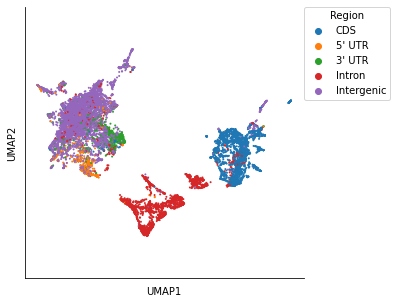

In [506]:
# could try plotting frame among the CDS, for example

plt.figure(figsize=(5, 5))
g = sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="Region",
    hue_order=region_order,
    s=4,
    linewidth=0,
)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.);
sns.despine()
plt.xticks([], [])
plt.yticks([], [])
g.get_legend().set_title("Region")
plt.axis('equal');
#plt.savefig("umap_embedding.svg", bbox_inches="tight");

In [336]:
segmentation_subset.transcript_id_2.value_counts()

AT5G11530.1    697
AT5G12350.1    535
AT5G12400.1    530
AT5G11730.1    499
AT5G11060.1    494
              ... 
AT5G12210.2      3
AT5G12150.1      3
AT5G12370.3      2
AT5G10020.2      1
AT5G10605.1      1
Name: transcript_id_2, Length: 307, dtype: int64

In [342]:
segmentation_subset.transcript_id_2.value_counts().head(10).index.values

array(['AT5G11530.1', 'AT5G12350.1', 'AT5G12400.1', 'AT5G11730.1',
       'AT5G11060.1', 'AT5G12430.1', 'AT5G10010.1', 'AT5G10720.1',
       'AT5G11670.1', 'AT5G09970.1'], dtype=object)

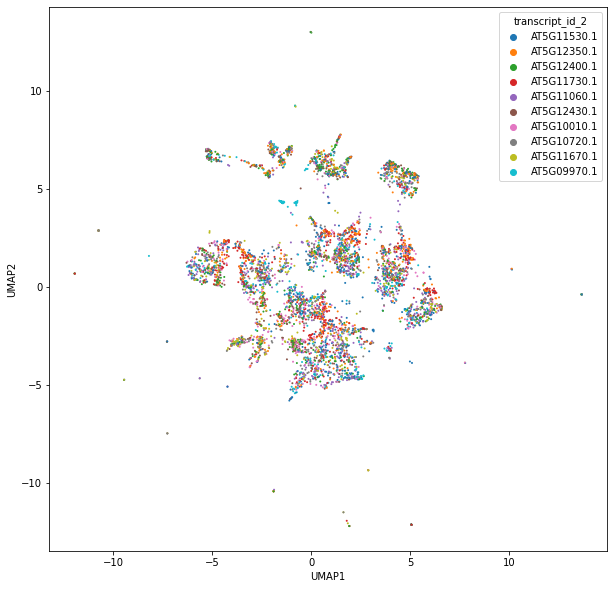

In [344]:
txs = segmentation_subset.transcript_id_2.value_counts().head(10).index.values

plt.figure(figsize=(10, 10))
g = sns.scatterplot(
    data=segmentation_subset[segmentation_subset.transcript_id_2.isin(txs)],
    x="UMAP1",
    y="UMAP2",
    hue="transcript_id_2",
    hue_order=txs,
    s=4,
    linewidth=0,
)

In [347]:
from sklearn.cluster import KMeans
segmentation_subset["cluster"] = KMeans().fit_predict(embedding_subset).astype(str)
segmentation_subset

,Region,chrom,start,end,chrom_2,source_2,feature_2,start_2,end_2,score_2,strand_2,frame_2,attribute_2,transcript_id_2,distance,nucleotide,nucleotide_window,UMAP1,UMAP2,cluster
pos,,,,,,,,,,,,,,,,,,,,
331479,Intergenic,Chr5,331479,331480,Chr5,TAIR10,mRNA,329775,331363,.,+,.,ID=AT5G10745.1;Parent=AT5G10745;Name=AT5G10745...,AT5G10745.1,116,A,CTTGGTATTATGTGACAATTCTTATAAAAGCTT,4.041771,0.845795,0
378768,3' UTR,Chr5,378768,378769,Chr5,TAIR10,mRNA,378666,380414,.,-,.,ID=AT5G10930.1;Parent=AT5G10930;Name=AT5G10930...,AT5G10930.1,0,A,AAAAGAAGTAAAACCAAAATTTTATTAAACCAA,1.680148,-3.065790,2
715973,3' UTR,Chr5,715973,715974,Chr5,TAIR10,mRNA,713611,716013,.,+,.,ID=AT5G11730.1;Parent=AT5G11730;Name=AT5G11730...,AT5G11730.1,0,C,TTTGGGACTATCTTTTCAGATGCATTATTGAAT,5.602551,-1.005854,6
123546,5' UTR,Chr5,123546,123547,Chr5,TAIR10,mRNA,120577,123551,.,-,.,ID=AT5G10170.1;Parent=AT5G10170;Name=AT5G10170...,AT5G10170.1,0,T,TTTGCTCGAGTGCTTCTGAATGCATTGAGATTT,4.178034,1.702231,0
660166,Intergenic,Chr5,660166,660167,Chr5,TAIR10,mRNA,660834,662026,.,-,.,ID=AT5G11590.1;Parent=AT5G11590;Name=AT5G11590...,AT5G11590.1,667,A,TCCAAGTTATATGTGGAAATTAAATAGATGCTC,-0.375802,-0.946165,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329195,5' UTR,Chr5,329195,329196,Chr5,TAIR10,mRNA,326869,329500,.,-,.,ID=AT5G10740.1;Parent=AT5G10740;Name=AT5G10740...,AT5G10740.1,0,A,TATTCTTCGAATCAACAGATAATCTGCCCGGAA,4.599685,2.085112,2
62160,Intron,Chr5,62160,62161,Chr5,TAIR10,mRNA,61206,65027,.,+,.,ID=AT5G10010.1;Parent=AT5G10010;Name=AT5G10010...,AT5G10010.1,0,T,TGGTGTTATCTCATTATCAAAAATATCTTCAAT,-3.121192,-0.547745,6
641023,Intergenic,Chr5,641023,641024,Chr5,TAIR10,mRNA,641309,642546,.,-,.,ID=AT5G11550.1;Parent=AT5G11550;Name=AT5G11550...,AT5G11550.1,285,T,ACCTATAAAATTCAACTCAAAACCAATCGTATG,0.016565,1.032779,1


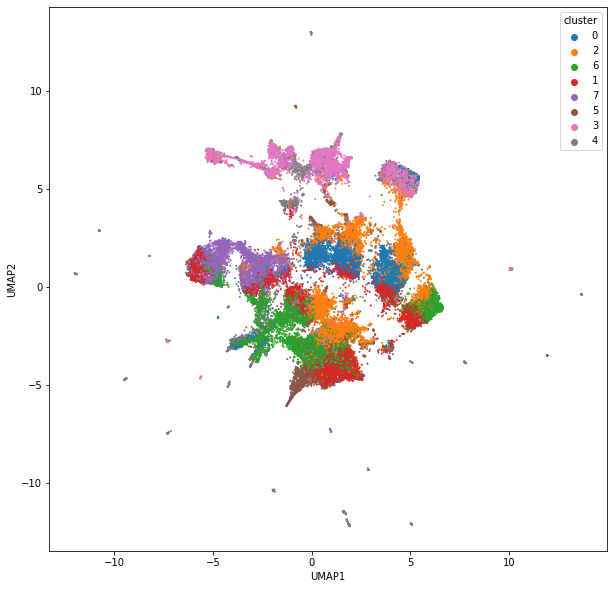

In [348]:
plt.figure(figsize=(10, 10))
g = sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="cluster",
    s=4,
    linewidth=0,
)

<AxesSubplot:xlabel='cluster', ylabel='count'>

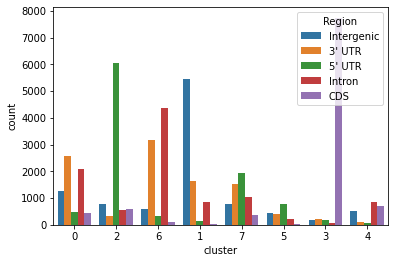

In [351]:
sns.countplot(
    data=segmentation_subset,
    x="cluster",
    hue="Region",
)

In [352]:
# TODO: maybe try hierarchical clustering?

## Correlation analysis

In [353]:
gtf

,chrom,source,feature,start,end,score,strand,frame,attribute
473306,Chr5,TAIR10,CDS,115,117,.,+,0,"Parent=AT5G09860.1,AT5G09860.1-Protein;"
473307,Chr5,TAIR10,exon,217,300,.,+,.,Parent=AT5G09860.1
473308,Chr5,TAIR10,CDS,217,300,.,+,0,"Parent=AT5G09860.1,AT5G09860.1-Protein;"
473309,Chr5,TAIR10,exon,377,451,.,+,.,Parent=AT5G09860.1
473310,Chr5,TAIR10,CDS,377,451,.,+,0,"Parent=AT5G09860.1,AT5G09860.1-Protein;"
...,...,...,...,...,...,...,...,...,...
479758,Chr5,TAIR10,CDS,997959,998239,.,-,0,"Parent=AT5G12870.1,AT5G12870.1-Protein;"
479759,Chr5,TAIR10,exon,997959,998292,.,-,.,Parent=AT5G12870.1
479760,Chr5,TAIR10,CDS,996239,996800,.,-,1,"Parent=AT5G12870.1,AT5G12870.1-Protein;"
479761,Chr5,TAIR10,three_prime_UTR,996024,996238,.,-,.,Parent=AT5G12870.1


In [354]:
gtf.feature.value_counts()

exon                         2417
CDS                          2287
mRNA                          367
five_prime_UTR                365
three_prime_UTR               337
tRNA                            7
transposable_element_gene       3
mRNA_TE_gene                    3
ncRNA                           2
miRNA                           2
pseudogenic_exon                2
snoRNA                          1
pseudogene                      1
pseudogenic_transcript          1
Name: feature, dtype: int64

In [403]:
# could add to the annotation the funtfbs, just concat
annotation_features = gtf.feature.unique()#value_counts().head(8).index.values
annotation_features

array(['CDS', 'exon', 'three_prime_UTR', 'mRNA', 'five_prime_UTR', 'tRNA',
       'ncRNA', 'snoRNA', 'transposable_element_gene', 'mRNA_TE_gene',
       'miRNA', 'pseudogene', 'pseudogenic_transcript',
       'pseudogenic_exon'], dtype=object)

In [404]:
intervals = {}
for f in annotation_features:
    intervals[f] = bf.merge(gtf[gtf.feature==f])

In [409]:
data = pd.DataFrame(dict(start=np.arange(len(embedding)))) 
# TODO: be careful of +-1 indexing errors
data["end"] = data.start + 1
data["chrom"] = "Chr5"
data

,start,end,chrom
0,0,1,Chr5
1,1,2,Chr5
2,2,3,Chr5
3,3,4,Chr5
4,4,5,Chr5
...,...,...,...
999995,999995,999996,Chr5
999996,999996,999997,Chr5
999997,999997,999998,Chr5
999998,999998,999999,Chr5


In [411]:
for f in annotation_features:
    data = bf.coverage(data, intervals[f])
    data.coverage = data.coverage.clip(0, 1)
    data.rename(columns=dict(coverage=f), inplace=True)
data

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,snoRNA,transposable_element_gene,mRNA_TE_gene,miRNA,pseudogene,pseudogenic_transcript,pseudogenic_exon
0,0,1,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999996,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999996,999996,999997,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999997,999997,999998,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999998,999998,999999,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [412]:
data[annotation_features].mean()

CDS                          0.350164
exon                         0.441308
three_prime_UTR              0.058038
mRNA                         0.658623
five_prime_UTR               0.029360
tRNA                         0.000519
ncRNA                        0.004482
snoRNA                       0.000132
transposable_element_gene    0.005921
mRNA_TE_gene                 0.005921
miRNA                        0.000180
pseudogene                   0.000676
pseudogenic_transcript       0.000676
pseudogenic_exon             0.000443
dtype: float64

In [413]:
n_pcs = 40
pcs = np.arange(n_pcs)

In [414]:
data.loc[:, pcs] = latent[:, :n_pcs]
data

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,...,30,31,32,33,34,35,36,37,38,39
0,0,1,Chr5,0,0,0,0,0,0,0,...,-2.358121,0.712073,-0.950514,0.526773,-0.175083,-0.764289,0.249556,0.115611,0.554959,0.589229
1,1,2,Chr5,0,0,0,0,0,0,0,...,-1.588170,0.756946,0.283574,-0.783952,2.520730,0.276294,-0.051267,-0.321374,-1.087651,-0.738611
2,2,3,Chr5,0,0,0,0,0,0,0,...,0.308093,0.441875,0.234778,-1.044889,0.516632,-1.009655,1.279221,0.856556,0.946851,-0.991507
3,3,4,Chr5,0,0,0,0,0,0,0,...,-0.269257,0.100542,-0.460458,-2.775196,-0.144680,-2.214485,0.201702,-0.938874,2.392057,-1.107705
4,4,5,Chr5,0,0,0,0,0,0,0,...,-0.032298,-0.047459,0.630631,-2.928830,1.299786,-0.795617,0.840993,0.668070,-1.362686,-0.141550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999996,Chr5,0,0,0,0,0,0,0,...,-1.832856,1.947304,-1.709038,1.786756,2.368179,-1.882302,-1.289365,-0.029063,0.930450,-0.897367
999996,999996,999997,Chr5,0,0,0,0,0,0,0,...,-0.592036,0.937474,1.055952,0.683549,-0.908981,-1.396526,-1.249965,1.174262,0.537703,-0.377596
999997,999997,999998,Chr5,0,0,0,0,0,0,0,...,2.147378,0.530730,-0.577683,0.448981,0.711662,-1.262944,-1.301859,1.096223,-1.018423,-0.638121
999998,999998,999999,Chr5,0,0,0,0,0,0,0,...,0.093699,0.641531,-1.168807,0.679826,0.243709,-1.364827,0.464892,1.006120,1.145317,1.470867


In [ ]:
ce

In [416]:
data["nucleotide"] = list(str(genome["5"][center-window_size//2:center+window_size//2].seq))
data

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,...,31,32,33,34,35,36,37,38,39,nucleotide
0,0,1,Chr5,0,0,0,0,0,0,0,...,0.712073,-0.950514,0.526773,-0.175083,-0.764289,0.249556,0.115611,0.554959,0.589229,T
1,1,2,Chr5,0,0,0,0,0,0,0,...,0.756946,0.283574,-0.783952,2.520730,0.276294,-0.051267,-0.321374,-1.087651,-0.738611,C
2,2,3,Chr5,0,0,0,0,0,0,0,...,0.441875,0.234778,-1.044889,0.516632,-1.009655,1.279221,0.856556,0.946851,-0.991507,A
3,3,4,Chr5,0,0,0,0,0,0,0,...,0.100542,-0.460458,-2.775196,-0.144680,-2.214485,0.201702,-0.938874,2.392057,-1.107705,A
4,4,5,Chr5,0,0,0,0,0,0,0,...,-0.047459,0.630631,-2.928830,1.299786,-0.795617,0.840993,0.668070,-1.362686,-0.141550,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999996,Chr5,0,0,0,0,0,0,0,...,1.947304,-1.709038,1.786756,2.368179,-1.882302,-1.289365,-0.029063,0.930450,-0.897367,T
999996,999996,999997,Chr5,0,0,0,0,0,0,0,...,0.937474,1.055952,0.683549,-0.908981,-1.396526,-1.249965,1.174262,0.537703,-0.377596,C
999997,999997,999998,Chr5,0,0,0,0,0,0,0,...,0.530730,-0.577683,0.448981,0.711662,-1.262944,-1.301859,1.096223,-1.018423,-0.638121,G
999998,999998,999999,Chr5,0,0,0,0,0,0,0,...,0.641531,-1.168807,0.679826,0.243709,-1.364827,0.464892,1.006120,1.145317,1.470867,C


In [421]:
mean_pcs = data.groupby("nucleotide")[pcs].mean()
mean_pcs

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
nucleotide,,,,,,,,,,,,,,,,,,,,,
A,-1.290451,-2.595569,-0.205062,-0.110030,-0.114090,-0.006699,-0.013491,0.070140,0.019911,0.157022,...,-0.009695,0.006237,0.018262,-0.033678,-0.017102,-0.015445,-0.014710,-0.000637,0.002326,-0.028578
C,2.265375,4.479148,0.350394,0.229736,0.242313,0.034060,0.082546,-0.113429,-0.010060,-0.275791,...,0.018594,-0.010819,-0.007970,0.075884,0.024332,0.046160,0.028505,-0.001732,-0.021497,0.039905
G,2.184806,4.516558,0.373682,0.224924,0.184441,0.012921,0.056490,-0.115956,-0.031599,-0.296659,...,0.000749,-0.001104,-0.016057,0.068844,0.017508,0.030651,0.023993,0.003939,-0.032277,0.048931
T,-1.275762,-2.591974,-0.212542,-0.152469,-0.132153,-0.020499,-0.067081,0.062081,0.003992,0.173206,...,-0.001405,0.000601,-0.004573,-0.049901,-0.006955,-0.028952,-0.015571,-0.000634,0.028874,-0.022606


In [425]:
data[pcs] = data[pcs] - mean_pcs.loc[data.nucleotide].values

In [435]:
#data["cluster"] = KMeans(n_clusters=20, n_init=100, random_state=42).fit_predict(data[pcs]).astype(str)

KeyboardInterrupt: 

In [438]:
data_subset = data.sample(n=300000, random_state=42)
data_subset

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,...,31,32,33,34,35,36,37,38,39,nucleotide
987231,987231,987232,Chr5,0,0,0,0,0,0,0,...,-0.093461,0.390257,-0.184742,1.211088,-0.859433,-0.490923,1.159828,-2.307558,-1.015837,G
79954,79954,79955,Chr5,0,0,0,1,0,0,0,...,1.072946,0.346784,0.561880,-0.151201,0.078894,1.133877,-0.126926,0.363619,0.424589,A
567130,567130,567131,Chr5,0,0,0,1,0,0,0,...,-2.636995,-0.434494,-1.160764,1.123380,-0.595101,0.465398,-1.455604,0.849115,0.551429,A
500891,500891,500892,Chr5,0,0,0,1,0,0,0,...,0.876403,-0.143923,-0.296141,-3.172767,-0.908731,-1.874104,-0.806037,-0.235392,2.887812,C
55399,55399,55400,Chr5,0,0,0,0,0,0,0,...,-1.528098,0.153429,0.584841,1.763577,0.866494,-1.404309,2.791454,-1.418540,-1.390683,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463299,463299,463300,Chr5,0,0,0,0,0,0,0,...,-0.345807,1.370208,-1.161182,0.451274,0.682794,0.331327,-0.406276,0.898876,0.636290,A
728324,728324,728325,Chr5,0,0,0,1,0,0,0,...,0.338228,2.243634,-0.732405,-0.305946,0.085338,-0.967285,-0.632990,-1.026298,0.444691,A
76260,76260,76261,Chr5,0,0,0,1,0,0,0,...,-3.690454,0.698987,-0.758276,0.169889,-3.223986,1.732122,2.315105,-0.529973,-1.110500,T
77813,77813,77814,Chr5,1,1,0,1,0,0,0,...,2.221086,0.972497,-1.299588,-2.340309,0.113928,-2.052064,0.760048,1.564924,1.092863,C


In [439]:
data_subset[["UMAP1", "UMAP2"]] = UMAP(random_state=42).fit_transform(data_subset[pcs])
data_subset

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,...,33,34,35,36,37,38,39,nucleotide,UMAP1,UMAP2
987231,987231,987232,Chr5,0,0,0,0,0,0,0,...,-0.184742,1.211088,-0.859433,-0.490923,1.159828,-2.307558,-1.015837,G,-6.437586,-4.121195
79954,79954,79955,Chr5,0,0,0,1,0,0,0,...,0.561880,-0.151201,0.078894,1.133877,-0.126926,0.363619,0.424589,A,7.908453,-1.852996
567130,567130,567131,Chr5,0,0,0,1,0,0,0,...,-1.160764,1.123380,-0.595101,0.465398,-1.455604,0.849115,0.551429,A,-3.766204,-1.720654
500891,500891,500892,Chr5,0,0,0,1,0,0,0,...,-0.296141,-3.172767,-0.908731,-1.874104,-0.806037,-0.235392,2.887812,C,-2.262095,0.933779
55399,55399,55400,Chr5,0,0,0,0,0,0,0,...,0.584841,1.763577,0.866494,-1.404309,2.791454,-1.418540,-1.390683,T,1.049341,-8.055316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463299,463299,463300,Chr5,0,0,0,0,0,0,0,...,-1.161182,0.451274,0.682794,0.331327,-0.406276,0.898876,0.636290,A,-4.376467,6.690876
728324,728324,728325,Chr5,0,0,0,1,0,0,0,...,-0.732405,-0.305946,0.085338,-0.967285,-0.632990,-1.026298,0.444691,A,8.633216,-1.561254
76260,76260,76261,Chr5,0,0,0,1,0,0,0,...,-0.758276,0.169889,-3.223986,1.732122,2.315105,-0.529973,-1.110500,T,-5.237845,-3.501006
77813,77813,77814,Chr5,1,1,0,1,0,0,0,...,-1.299588,-2.340309,0.113928,-2.052064,0.760048,1.564924,1.092863,C,5.919032,1.505908


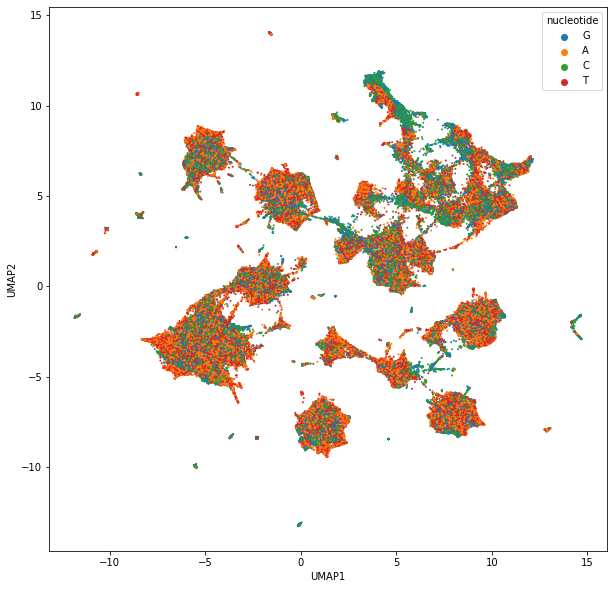

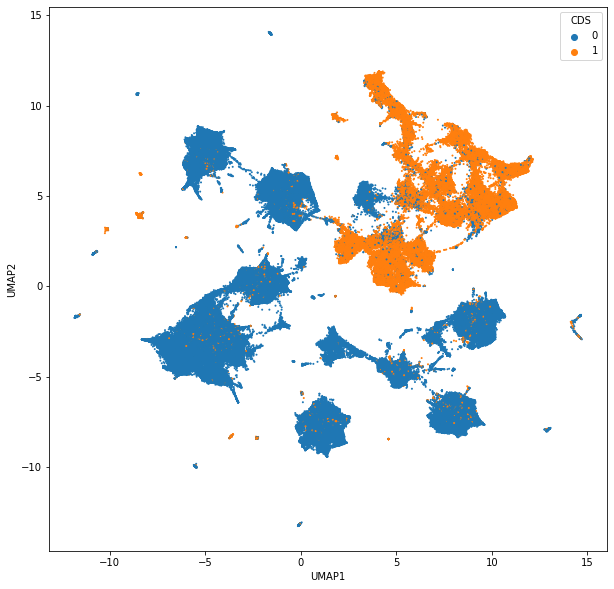

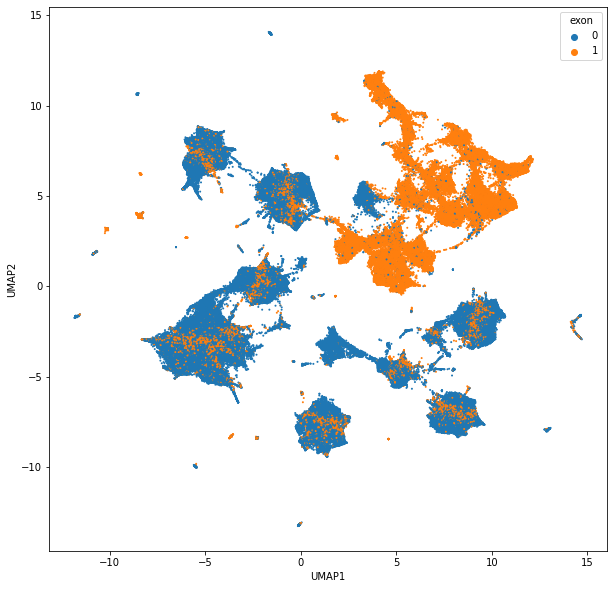

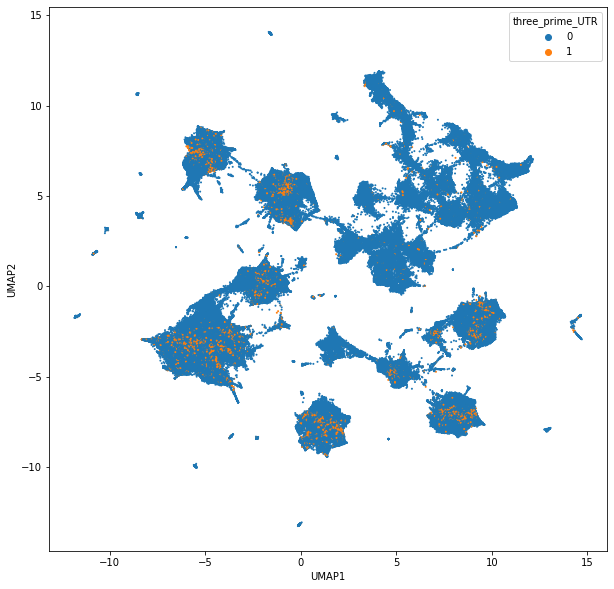

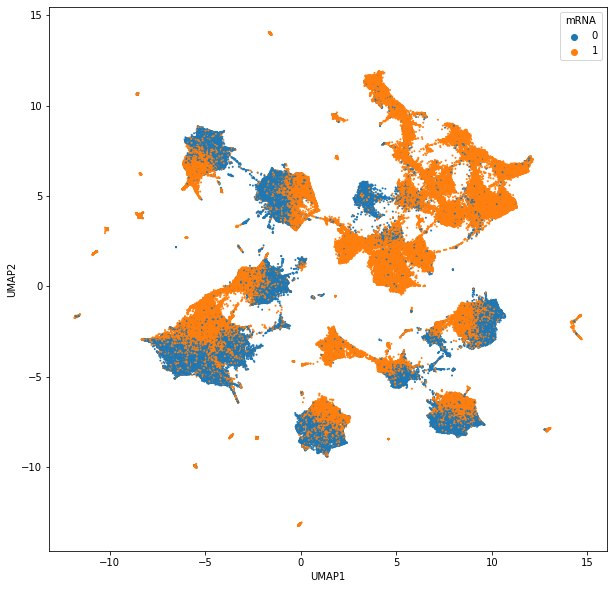

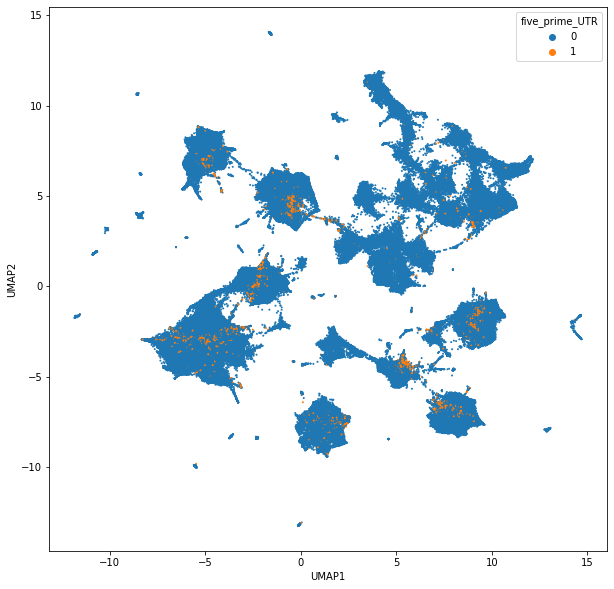

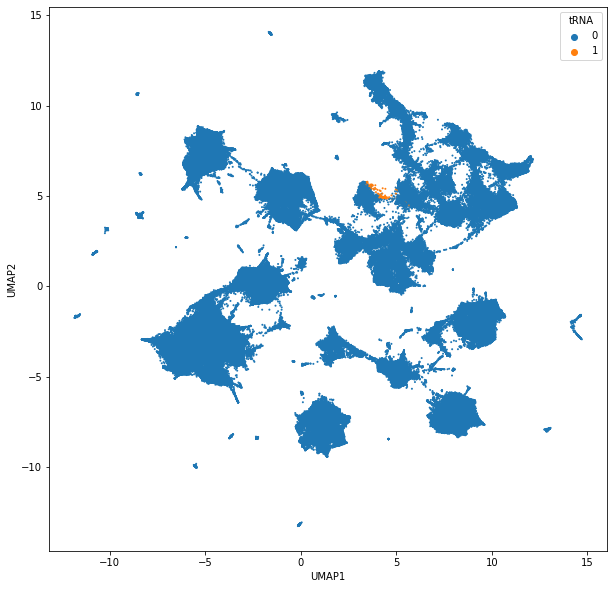

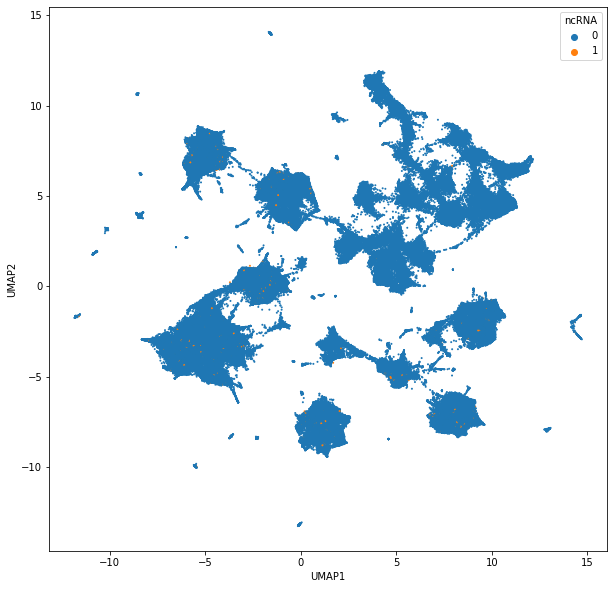

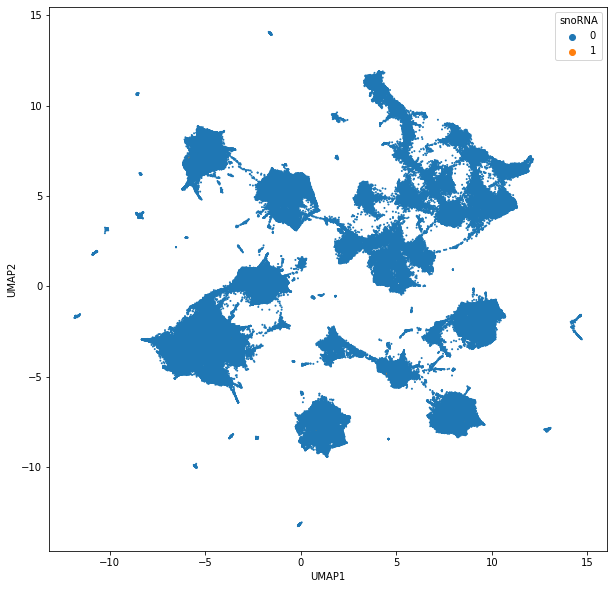

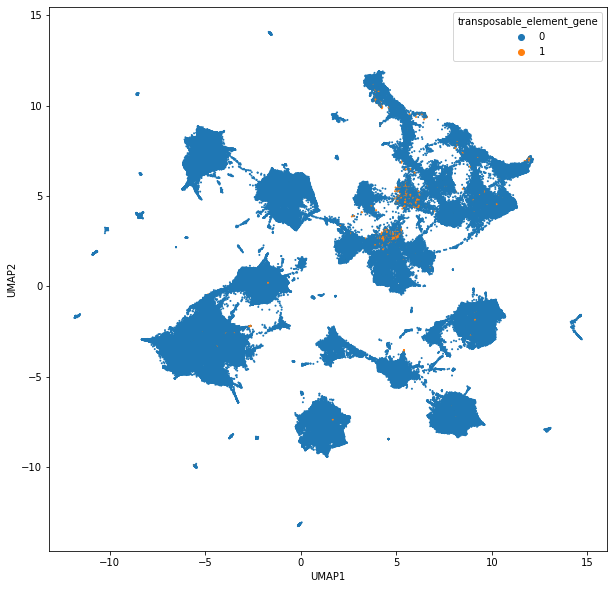

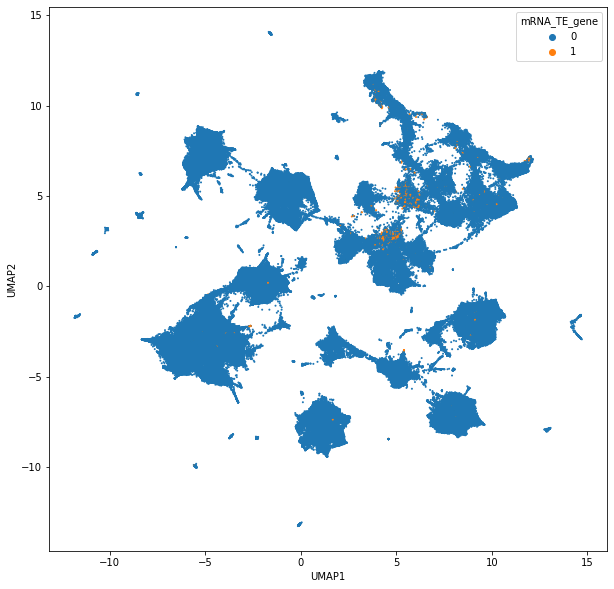

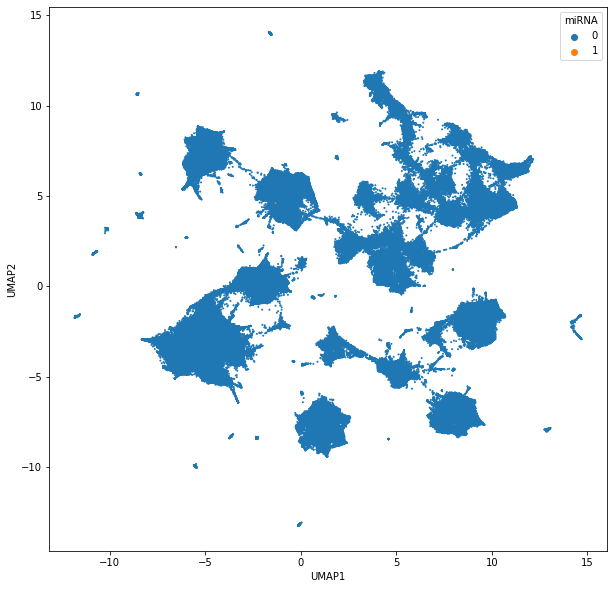

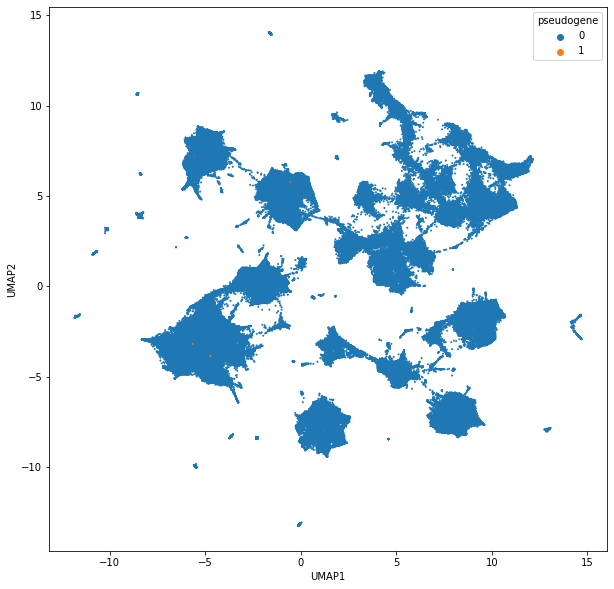

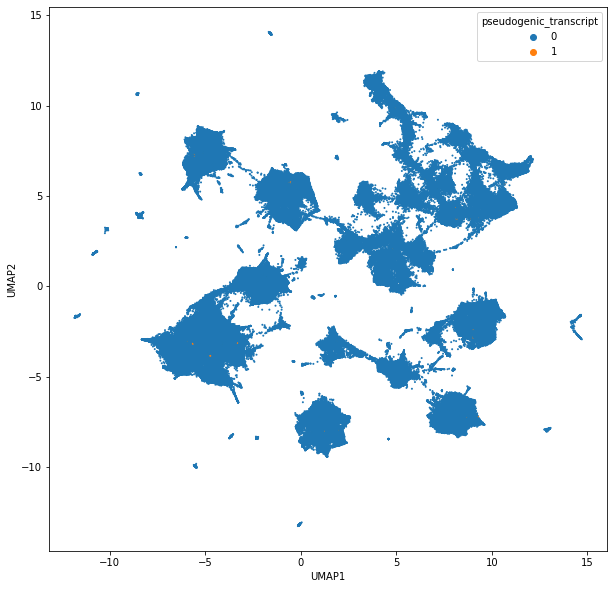

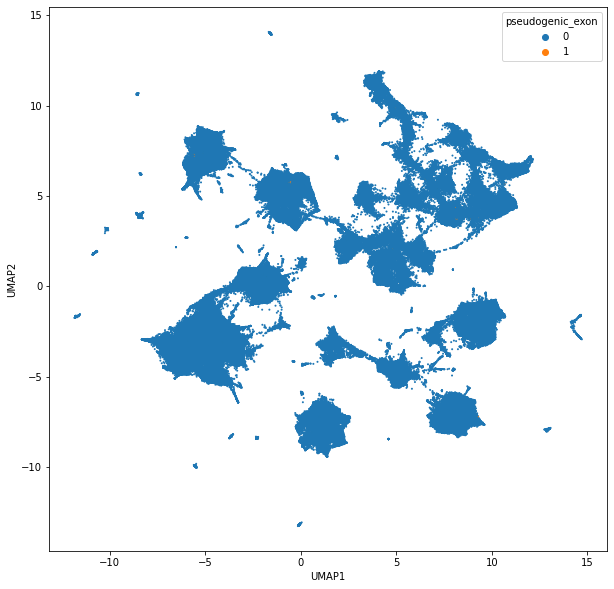

In [440]:
plot_features = np.concatenate([["nucleotide"], annotation_features])

for f in plot_features:
    plt.figure(figsize=(10, 10))
    g = sns.scatterplot(
        data=data_subset,
        x="UMAP1",
        y="UMAP2",
        hue=f,
        s=4,
        linewidth=0,
    )

## UMAP embedding of genomic windows

In [74]:
gtf = pd.read_csv(
    #"../../data/vep/tair10.gff",
    #"atRTD3_TS_21Feb22_transfix.gtf",
    "Arabidopsis_thaliana.TAIR10.54.chromosome.5.gff3.gz",
    sep='\t', header=None, comment="#",
    names=['chrom', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'],
)
gtf.chrom = gtf.chrom.astype(str)
gtf = gtf[gtf.chrom.isin(["Chr5", "chr5", "5"])]
gtf.shape

(180531, 9)

In [75]:
# To work with the already computed 1Mb embeddings
gtf = gtf[(gtf.start > center-window_size//2) & (gtf.end < center+window_size//2)]
gtf.start -= (center-window_size//2)
gtf.end -= (center-window_size//2)
gtf.shape

(8942, 9)

In [76]:
gtf_exon = gtf[gtf.feature=="exon"]

In [77]:
gtf_exon["transcript_id"] = gtf_exon.attribute.str.split(";").str[0].str.split(":").str[-1]
#gtf_exon["transcript_id"] = gtf_exon.attribute.str.split('"').str[3]

gtf_exon.transcript_id.value_counts()

/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


AT5G12370.1    25
AT5G12370.3    25
AT5G12370.2    25
AT5G10470.2    23
AT5G10470.1    23
               ..
AT5G10040.1     1
AT5G11140.1     1
AT5G01675.2     1
AT5G01635.1     1
AT5G11230.1     1
Name: transcript_id, Length: 574, dtype: int64

In [78]:
import more_itertools

def get_transcript_introns(df_transcript):
    df_transcript = df_transcript.sort_values("start")
    exon_pairs = more_itertools.pairwise(df_transcript.loc[:, ["start", "end"]].values)
    introns = [[e1[1], e2[0]] for e1, e2 in exon_pairs]
    introns = pd.DataFrame(introns, columns=["start", "end"])
    introns["chrom"] = df_transcript.chrom.iloc[0]
    return introns

In [79]:
gtf_introns = gtf_exon.groupby("transcript_id").apply(get_transcript_introns).reset_index().drop_duplicates(subset=["chrom", "start", "end"])
gtf_introns["feature"] = "intron"
gtf_introns

,transcript_id,level_1,start,end,chrom,feature
0,AT5G01675.1,0,106810,107020,5,intron
1,AT5G01675.3,0,106810,112384,5,intron
2,AT5G01675.4,0,107142,112184,5,intron
3,AT5G01675.4,1,112196,112384,5,intron
4,AT5G01675.5,0,107076,112184,5,intron
...,...,...,...,...,...,...
3025,AT5G12850.1,0,989717,990339,5,intron
3026,AT5G12860.1,0,993589,993680,5,intron
3027,AT5G12860.1,1,993901,994131,5,intron
3028,AT5G12860.2,0,993150,993231,5,intron


In [80]:
gtf = pd.concat([gtf, gtf_introns], ignore_index=True)
gtf

,chrom,source,feature,start,end,score,strand,frame,attribute,transcript_id,level_1
0,5,araport11,CDS,115,117,.,+,0,ID=CDS:AT5G09860.2;Parent=transcript:AT5G09860...,NaN,NaN
1,5,araport11,exon,217,300,.,+,.,Parent=transcript:AT5G09860.2;Name=AT5G09860.1...,NaN,NaN
2,5,araport11,CDS,217,300,.,+,0,ID=CDS:AT5G09860.2;Parent=transcript:AT5G09860...,NaN,NaN
3,5,araport11,exon,377,451,.,+,.,Parent=transcript:AT5G09860.2;Name=AT5G09860.1...,NaN,NaN
4,5,araport11,CDS,377,451,.,+,0,ID=CDS:AT5G09860.2;Parent=transcript:AT5G09860...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10474,5,NaN,intron,989717,990339,NaN,NaN,NaN,NaN,AT5G12850.1,0.0
10475,5,NaN,intron,993589,993680,NaN,NaN,NaN,NaN,AT5G12860.1,0.0
10476,5,NaN,intron,993901,994131,NaN,NaN,NaN,NaN,AT5G12860.1,1.0
10477,5,NaN,intron,993150,993231,NaN,NaN,NaN,NaN,AT5G12860.2,0.0


In [81]:
gtf.feature.value_counts()

exon               3606
CDS                3242
intron             1537
five_prime_UTR      641
three_prime_UTR     560
mRNA                521
gene                280
ncRNA_gene           41
lnc_RNA              33
tRNA                  7
miRNA                 6
ncRNA                 2
snoRNA                2
snRNA                 1
Name: feature, dtype: int64

In [82]:
gtf.chrom = gtf.chrom.astype(str)
gtf.start = gtf.start.astype(int)
gtf.end = gtf.end.astype(int)

In [83]:
features_of_interest = ['CDS', 'five_prime_UTR', 'three_prime_UTR', 'intron']

In [84]:
W = 50
windows = pd.DataFrame(dict(start=np.arange(0+10000, window_size-W-10000, W)))
windows["end"] = windows.start + W
windows["chrom"] = gtf.chrom.iloc[0] #"5"

for f in features_of_interest:
    windows = bf.coverage(windows, gtf[gtf.feature==f])
    windows.rename(columns=dict(coverage=f), inplace=True)
windows

,start,end,chrom,CDS,five_prime_UTR,three_prime_UTR,intron
0,10000,10050,5,50,0,0,0
1,10050,10100,5,50,0,0,0
2,10100,10150,5,6,0,0,44
3,10150,10200,5,0,0,0,50
4,10200,10250,5,45,0,0,5
...,...,...,...,...,...,...,...
19594,989700,989750,5,0,17,0,33
19595,989750,989800,5,0,0,0,50
19596,989800,989850,5,0,0,0,50
19597,989850,989900,5,0,0,0,50


In [85]:
windows["Region"]= np.nan
windows.loc[windows[features_of_interest].sum(axis=1)==0, "Region"] = "Intergenic"
windows.loc[(windows.CDS==0)&(windows.five_prime_UTR==0)&(windows.three_prime_UTR==0)&(windows.intron==W), "Region"] = "Intron"
windows.loc[(windows.CDS==W)&(windows.five_prime_UTR==0)&(windows.three_prime_UTR==0)&(windows.intron==0), "Region"] = "CDS"
windows.loc[(windows.CDS==0)&(windows.five_prime_UTR==W)&(windows.three_prime_UTR==0)&(windows.intron==0), "Region"] = "5' UTR"
windows.loc[(windows.CDS==0)&(windows.five_prime_UTR==0)&(windows.three_prime_UTR==W)&(windows.intron==0), "Region"] = "3' UTR"
windows.Region.value_counts()

Intergenic    5327
CDS           4843
Intron        3096
3' UTR        1116
5' UTR         764
Name: Region, dtype: int64

In [86]:
windows.dropna(inplace=True)
windows.shape

(15146, 8)

In [87]:
embedding_cols = np.arange(embedding.shape[1])
windows.loc[:, embedding_cols] = windows.apply(
    lambda row: embedding[row.start:row.end].sum(axis=0),
    axis=1,
    result_type="expand",
)
windows

,start,end,chrom,CDS,five_prime_UTR,three_prime_UTR,intron,Region,0,1,...,502,503,504,505,506,507,508,509,510,511
0,10000,10050,5,50,0,0,0,CDS,34.672813,-107.289017,...,-46.030354,-143.367966,62.085907,-28.708609,-50.329376,903.510498,-22.606819,-98.776466,-67.953873,-106.616112
1,10050,10100,5,50,0,0,0,CDS,40.667492,-55.843456,...,-71.122879,-158.264420,50.635822,0.625024,-51.620201,637.100037,3.589726,-46.532887,51.942341,-148.520432
3,10150,10200,5,0,0,0,50,Intron,72.211510,-94.532684,...,26.257721,-132.698471,7.909805,-24.808949,-91.383064,323.360260,74.373650,-108.285675,-35.965591,-141.917526
5,10250,10300,5,50,0,0,0,CDS,86.237137,-143.942032,...,-29.101845,-90.875412,30.543547,-51.987099,-67.673912,463.811646,32.420303,-98.261055,66.536392,-38.648346
6,10300,10350,5,50,0,0,0,CDS,49.420155,-124.991638,...,63.340485,-115.587769,95.569801,-44.396305,-115.277161,526.904358,-19.915186,-115.385574,65.987617,-70.864975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19593,989650,989700,5,0,50,0,0,5' UTR,18.278177,-115.380035,...,-96.954353,-126.319176,-93.772690,-54.744087,-97.828217,551.968994,29.584116,-152.306229,-137.537064,-94.711044
19595,989750,989800,5,0,0,0,50,Intron,-55.355553,-127.011276,...,-89.038750,-137.733353,-77.270721,-64.412254,-113.088799,163.991058,92.473961,-110.821129,-126.862381,-126.829399
19596,989800,989850,5,0,0,0,50,Intron,-35.021305,-125.330521,...,-77.477440,-110.193451,-56.994083,-66.478905,-92.628998,434.411499,65.833183,-100.860619,-132.675781,-136.567902
19597,989850,989900,5,0,0,0,50,Intron,-60.272190,-100.874832,...,-61.024681,-69.103302,-53.364883,-70.906555,-88.643478,203.100204,68.285789,-153.366714,-135.824280,-120.219803


In [88]:
projector = Pipeline([
    ("scaler", StandardScaler()),  # not sure it's a good idea. yeah, they have very different variances.
    #("pca", PCA(n_components=10)),
    ("umap", UMAP(n_components=2, random_state=42)),  # n_neighbors should change with number of positions
])
windows[["UMAP1", "UMAP2"]] = projector.fit_transform(windows[embedding_cols])

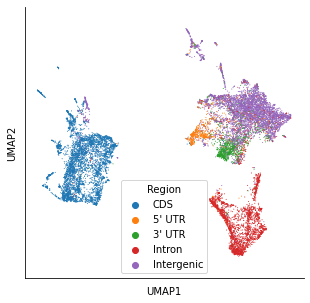

In [326]:
region_order = ["CDS", "5' UTR", "3' UTR", "Intron", "Intergenic"]


plt.figure(figsize=(5, 5))
g = sns.scatterplot(
    data=windows,
    x="UMAP1",
    y="UMAP2",
    hue="Region",
    hue_order=region_order,
    s=1,
    linewidth=0,
)
#plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.);
#g.get_legend().set_title("Region")
sns.despine()
plt.xticks([], [])
plt.yticks([], [])
plt.axis('equal');
plt.savefig("umap_embedding.svg", bbox_inches="tight");

In [219]:
"""from sklearn.cluster import KMeans, SpectralClustering

clustering_algorithm = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=10)),
    ("clustering", SpectralClustering(random_state=42)),
])

windows["cluster"] = clustering_algorithm.fit_predict(windows[embedding_cols]).astype(str)
windows"""

'from sklearn.cluster import KMeans, SpectralClustering\n\nclustering_algorithm = Pipeline([\n    ("scaler", StandardScaler()),\n    ("pca", PCA(n_components=10)),\n    ("clustering", SpectralClustering(random_state=42)),\n])\n\nwindows["cluster"] = clustering_algorithm.fit_predict(windows[embedding_cols]).astype(str)\nwindows'

In [212]:
import scanpy as sc
import anndata

adata = anndata.AnnData(StandardScaler().fit_transform(windows[embedding_cols]))
adata

AnnData object with n_obs × n_vars = 15146 × 512

In [241]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=100)
adata

AnnData object with n_obs × n_vars = 15146 × 512
    obs: 'leiden'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [277]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=100)

In [287]:
sc.tl.leiden(adata, resolution=0.25)

In [288]:
windows["cluster"] = adata.obs.leiden.values.astype(str)

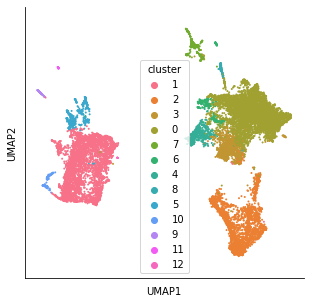

In [289]:
plt.figure(figsize=(5, 5))
g = sns.scatterplot(
    data=windows,
    x="UMAP1",
    y="UMAP2",
    hue="cluster",
    s=4,
    linewidth=0,
)
#plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.);
#g.get_legend().set_title("Region")
sns.despine()
plt.xticks([], [])
plt.yticks([], [])
plt.axis('equal');
#plt.savefig("umap_embedding_clustering.svg", bbox_inches="tight");

<AxesSubplot:xlabel='cluster', ylabel='count'>

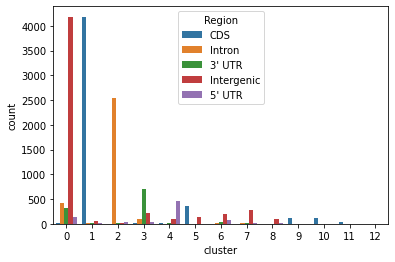

In [298]:
sns.countplot(
    data=windows,
    x="cluster",
    order=windows.cluster.astype(int).sort_values().unique().astype(str),
    hue="Region",
)

In [316]:
counts = windows.groupby(['cluster','Region']).Region.count().unstack().fillna(0)
counts = counts.loc[np.arange(len(windows.cluster.unique())).astype(str), region_order]
counts

Region,CDS,5' UTR,3' UTR,Intron,Intergenic
cluster,,,,,
0,12.0,135.0,323.0,411.0,4185.0
1,4182.0,7.0,9.0,9.0,66.0
2,5.0,37.0,13.0,2537.0,24.0
3,16.0,35.0,698.0,96.0,216.0
4,13.0,456.0,14.0,5.0,100.0
5,354.0,1.0,3.0,5.0,138.0
6,1.0,68.0,38.0,24.0,203.0
7,4.0,14.0,13.0,7.0,283.0
8,0.0,11.0,5.0,2.0,106.0


<AxesSubplot:xlabel='cluster'>

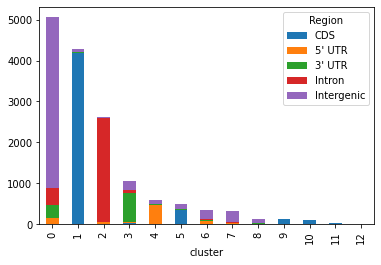

In [317]:
counts.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='cluster'>

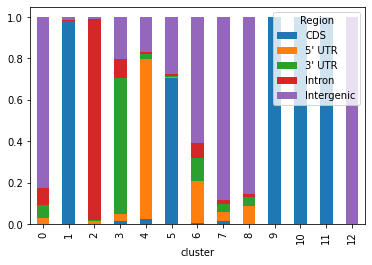

In [321]:
counts.div(counts.sum(axis=1), axis=0).plot(kind='bar', stacked=True)

### Few-shot classification

In [179]:
windows.Region.value_counts()

Intergenic    5327
CDS           4843
Intron        3096
3' UTR        1116
5' UTR         764
Name: Region, dtype: int64

In [181]:
windows_classification = windows.groupby("Region").sample(n=764, random_state=42)
windows_classification.Region.value_counts()

3' UTR        764
5' UTR        764
CDS           764
Intergenic    764
Intron        764
Name: Region, dtype: int64

In [293]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix

seeds = np.arange(10)
n_trains = [10, 100]

X = windows_classification[embedding_cols]
y = windows_classification.Region

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LogisticRegressionCV(max_iter=10000, Cs=100, verbose=1, random_state=42))
])

cms = []
rows = []

for seed in seeds:
    print(seed)
    for n_train in n_trains:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train*len(y.unique()), random_state=seed, stratify=y)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        cms.append(cm)
        for region, accuracy in zip(np.unique(y), cm.diagonal()):
            rows.append([seed, n_train, region, accuracy])

0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.5s finished


7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


8


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


9


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.5s finished


In [294]:
results = pd.DataFrame(rows, columns=["seed", "n_train_examples_per_region", "Region", "Accuracy"])
results

,seed,n_train_examples_per_region,Region,Accuracy
0,0,10,3' UTR,0.653846
1,0,10,5' UTR,0.733422
2,0,10,CDS,0.924403
3,0,10,Intergenic,0.805040
4,0,10,Intron,0.748011
...,...,...,...,...
95,9,100,3' UTR,0.775602
96,9,100,5' UTR,0.831325
97,9,100,CDS,0.990964
98,9,100,Intergenic,0.754518


([<matplotlib.axis.XTick at 0x2b811efe0950>,
 [Text(0, 0, ''), Text(0, 0, '')])

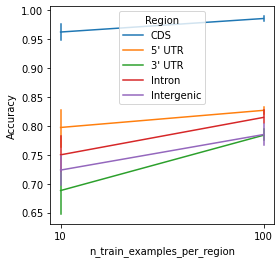

In [295]:
plt.figure(figsize=(4, 4))
sns.lineplot(
    data=results,
    x="n_train_examples_per_region",
    y="Accuracy",
    hue="Region",
    hue_order=region_order,
    err_style="bars",
)
plt.xticks(n_trains)
#plt.savefig("accuracy.svg", bbox_inches="tight");

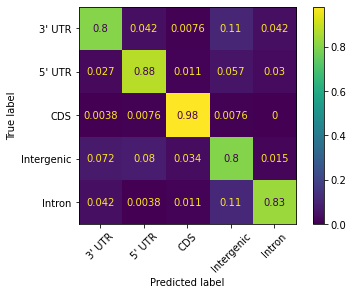

In [192]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

plt.xticks(rotation=45);

In [276]:
# source: https://github.com/MindAI/kmer

class kmer_featurization:

  def __init__(self, k):
    """
    seqs: a list of DNA sequences
    k: the "k" in k-mer
    """
    self.k = k
    self.letters = ['A', 'T', 'C', 'G']
    self.multiplyBy = 4 ** np.arange(k-1, -1, -1) # the multiplying number for each digit position in the k-number system
    self.n = 4**k # number of possible k-mers

  def obtain_kmer_feature_for_a_list_of_sequences(self, seqs, write_number_of_occurrences=False):
    """
    Given a list of m DNA sequences, return a 2-d array with shape (m, 4**k) for the 1-hot representation of the kmer features.
    Args:
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.    
    """
    kmer_features = []
    for seq in seqs:
      this_kmer_feature = self.obtain_kmer_feature_for_one_sequence(seq.upper(), write_number_of_occurrences=write_number_of_occurrences)
      kmer_features.append(this_kmer_feature)

    kmer_features = np.array(kmer_features)

    return kmer_features

  def obtain_kmer_feature_for_one_sequence(self, seq, write_number_of_occurrences=False):
    """
    Given a DNA sequence, return the 1-hot representation of its kmer feature.
    Args:
      seq: 
        a string, a DNA sequence
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.
    """
    number_of_kmers = len(seq) - self.k + 1

    kmer_feature = np.zeros(self.n)

    for i in range(number_of_kmers):
      this_kmer = seq[i:(i+self.k)]
      this_numbering = self.kmer_numbering_for_one_kmer(this_kmer)
      kmer_feature[this_numbering] += 1

    if not write_number_of_occurrences:
      kmer_feature = kmer_feature / number_of_kmers

    return kmer_feature

  def kmer_numbering_for_one_kmer(self, kmer):
    """
    Given a k-mer, return its numbering (the 0-based position in 1-hot representation)
    """
    digits = []
    for letter in kmer:
      digits.append(self.letters.index(letter))

    digits = np.array(digits)

    numbering = (digits * self.multiplyBy).sum()

    return numbering